# 기본 케라스와 텐서보드 연동하기

In [1]:
%load_ext tensorboard

### 0. 사용할 패키지 불러오기

In [9]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import tensorflow as tf

np.random.seed(3)

### 1. 데이터셋 생성하기
* 원본 데이터를 불러오거나 시뮬레이션을 통해 데이터를 생성합니다.
* 데이터로부터 훈련셋, 검증셋, 시험셋을 생성합니다.
* 이 때 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환을 합니다.

#### 1.1 훈련셋과 시험셋 로딩

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]        
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
print('X_train', X_train.shape)
print('X_train', Y_train.shape)
print('X_train', X_val.shape)
print('X_train', Y_val.shape)

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

X_train (50000, 28, 28)
X_train (50000,)
X_train (10000, 28, 28)
X_train (10000,)


#### 1.2 훈련셋, 검증셋 고르기

In [4]:
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

#### 1.3 라벨 데이터 원핫인코딩 처리

In [5]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

### 2. 모델 구성하기
* 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성합니다.
* 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용합니다.

In [6]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기
* 학습하기 전에 학습에 대한 설정을 수행합니다.
* 손실 함수 및 최적화 방법을 정의합니다.
* 케라스에서는 compile() 함수를 사용합니다.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기
* 훈련셋을 이용하여 구성한 모델로 학습시킵니다.
* 케라스에서는 fit() 함수를 사용합니다.
#### 4.1 배치사이즈
* 몇 개를  처리하고 해답을 맞추는지를 의미함 
    * 100 : 100개를 처리하고 해답을 맞춤
    * 1: 1개를 처리하고 해답을 맞춤
* 배치사이즈가 작을수록 갱신이 자주 발생함 
#### 4.2 에폭
* 같은 데이터셋으로 반복적으로 가중치를 갱신하면서 학습
* 서로 다른 20문제를 1번 푸는 경우보다 같은 1문제를 20번 푸는 경우 정확도가 높다.

In [11]:
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='.\\graph', histogram_freq=0, write_graph=True, write_images=True)
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 1s 1ms/sample - loss: 2.0382 - accuracy: 0.3729 - val_loss: 1.7526 - val_accuracy: 0.5900
Epoch 2/1000
700/700 [==============================] - 0s 245us/sample - loss: 1.5489 - accuracy: 0.6429 - val_loss: 1.3525 - val_accuracy: 0.7367
Epoch 3/1000
700/700 [==============================] - 0s 245us/sample - loss: 1.2098 - accuracy: 0.7343 - val_loss: 1.0962 - val_accuracy: 0.7700
Epoch 4/1000
700/700 [==============================] - 0s 279us/sample - loss: 0.9877 - accuracy: 0.7957 - val_loss: 0.9333 - val_accuracy: 0.8333
Epoch 5/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.8346 - accuracy: 0.8286 - val_loss: 0.8323 - val_accuracy: 0.8367
Epoch 6/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.7306 - accuracy: 0.8414 - val_loss: 0.7548 - val_accuracy: 0.8200
Epoch 7/1000
700/700 [==============================] - 0s 245us/sam

Epoch 56/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0861 - accuracy: 0.9929 - val_loss: 0.4686 - val_accuracy: 0.8667
Epoch 57/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0846 - accuracy: 0.9943 - val_loss: 0.4672 - val_accuracy: 0.8700
Epoch 58/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0823 - accuracy: 0.9943 - val_loss: 0.4719 - val_accuracy: 0.8667
Epoch 59/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0805 - accuracy: 0.9957 - val_loss: 0.4678 - val_accuracy: 0.8700
Epoch 60/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0785 - accuracy: 0.9957 - val_loss: 0.4716 - val_accuracy: 0.8633
Epoch 61/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0766 - accuracy: 0.9971 - val_loss: 0.4686 - val_accuracy: 0.8700
Epoch 62/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0749 - accuracy: 0.9957

Epoch 111/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0308 - accuracy: 1.0000 - val_loss: 0.5052 - val_accuracy: 0.8733
Epoch 112/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.5075 - val_accuracy: 0.8700
Epoch 113/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.5101 - val_accuracy: 0.8700
Epoch 114/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.5107 - val_accuracy: 0.8700
Epoch 115/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.5097 - val_accuracy: 0.8700
Epoch 116/1000
700/700 [==============================] - 0s 246us/sample - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.5092 - val_accuracy: 0.8667
Epoch 117/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0283 - accuracy:

700/700 [==============================] - 0s 242us/sample - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.5370 - val_accuracy: 0.8700
Epoch 166/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.5372 - val_accuracy: 0.8700
Epoch 167/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.5382 - val_accuracy: 0.8667
Epoch 168/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.5382 - val_accuracy: 0.8667
Epoch 169/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.5391 - val_accuracy: 0.8667
Epoch 170/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.5401 - val_accuracy: 0.8667
Epoch 171/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0160 - accuracy: 1.0000 - val_l

Epoch 220/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.5595 - val_accuracy: 0.8667
Epoch 221/1000
700/700 [==============================] - 0s 245us/sample - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.5598 - val_accuracy: 0.8667
Epoch 222/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.5602 - val_accuracy: 0.8667
Epoch 223/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.5608 - val_accuracy: 0.8667
Epoch 224/1000
700/700 [==============================] - 0s 246us/sample - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.5615 - val_accuracy: 0.8667
Epoch 225/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.5619 - val_accuracy: 0.8667
Epoch 226/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0107 - accuracy:

700/700 [==============================] - 0s 241us/sample - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.5771 - val_accuracy: 0.8667
Epoch 275/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.5777 - val_accuracy: 0.8667
Epoch 276/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.5778 - val_accuracy: 0.8667
Epoch 277/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.5782 - val_accuracy: 0.8667
Epoch 278/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.5781 - val_accuracy: 0.8667
Epoch 279/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.5790 - val_accuracy: 0.8667
Epoch 280/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0079 - accuracy: 1.0000 - val_l

Epoch 329/1000
700/700 [==============================] - 0s 246us/sample - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5931 - val_accuracy: 0.8667
Epoch 330/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5929 - val_accuracy: 0.8667
Epoch 331/1000
700/700 [==============================] - 0s 249us/sample - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5935 - val_accuracy: 0.8667
Epoch 332/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5938 - val_accuracy: 0.8667
Epoch 333/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.5936 - val_accuracy: 0.8667
Epoch 334/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.5940 - val_accuracy: 0.8667
Epoch 335/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0062 - accuracy:

700/700 [==============================] - 0s 242us/sample - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6052 - val_accuracy: 0.8667
Epoch 384/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6053 - val_accuracy: 0.8667
Epoch 385/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6056 - val_accuracy: 0.8667
Epoch 386/1000
700/700 [==============================] - 0s 251us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6058 - val_accuracy: 0.8667
Epoch 387/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6060 - val_accuracy: 0.8667
Epoch 388/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6061 - val_accuracy: 0.8667
Epoch 389/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0050 - accuracy: 1.0000 - val_l

Epoch 438/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.6163 - val_accuracy: 0.8633
Epoch 439/1000
700/700 [==============================] - 0s 259us/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.6166 - val_accuracy: 0.8633
Epoch 440/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.6167 - val_accuracy: 0.8633
Epoch 441/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.6170 - val_accuracy: 0.8633
Epoch 442/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.6172 - val_accuracy: 0.8633
Epoch 443/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6174 - val_accuracy: 0.8633
Epoch 444/1000
700/700 [==============================] - 0s 246us/sample - loss: 0.0042 - accuracy:

700/700 [==============================] - 0s 239us/sample - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6263 - val_accuracy: 0.8633
Epoch 493/1000
700/700 [==============================] - 0s 245us/sample - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6264 - val_accuracy: 0.8633
Epoch 494/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6266 - val_accuracy: 0.8633
Epoch 495/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6267 - val_accuracy: 0.8633
Epoch 496/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6269 - val_accuracy: 0.8633
Epoch 497/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6270 - val_accuracy: 0.8633
Epoch 498/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0036 - accuracy: 1.0000 - val_l

Epoch 547/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6350 - val_accuracy: 0.8633
Epoch 548/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6350 - val_accuracy: 0.8633
Epoch 549/1000
700/700 [==============================] - 0s 246us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6352 - val_accuracy: 0.8633
Epoch 550/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6354 - val_accuracy: 0.8633
Epoch 551/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6357 - val_accuracy: 0.8633
Epoch 552/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6358 - val_accuracy: 0.8633
Epoch 553/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0032 - accuracy:

700/700 [==============================] - 0s 246us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6429 - val_accuracy: 0.8633
Epoch 602/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6431 - val_accuracy: 0.8633
Epoch 603/1000
700/700 [==============================] - 0s 234us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6434 - val_accuracy: 0.8633
Epoch 604/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6434 - val_accuracy: 0.8633
Epoch 605/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6434 - val_accuracy: 0.8633
Epoch 606/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6436 - val_accuracy: 0.8633
Epoch 607/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0028 - accuracy: 1.0000 - val_l

Epoch 656/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6504 - val_accuracy: 0.8633
Epoch 657/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6505 - val_accuracy: 0.8633
Epoch 658/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6507 - val_accuracy: 0.8633
Epoch 659/1000
700/700 [==============================] - 0s 231us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6508 - val_accuracy: 0.8633
Epoch 660/1000
700/700 [==============================] - 0s 242us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6508 - val_accuracy: 0.8633
Epoch 661/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6511 - val_accuracy: 0.8633
Epoch 662/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0025 - accuracy:

700/700 [==============================] - 0s 237us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6570 - val_accuracy: 0.8633
Epoch 711/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6572 - val_accuracy: 0.8633
Epoch 712/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6573 - val_accuracy: 0.8633
Epoch 713/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6573 - val_accuracy: 0.8633
Epoch 714/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6574 - val_accuracy: 0.8633
Epoch 715/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6575 - val_accuracy: 0.8633
Epoch 716/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0023 - accuracy: 1.0000 - val_l

Epoch 765/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6632 - val_accuracy: 0.8633
Epoch 766/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6634 - val_accuracy: 0.8633
Epoch 767/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6635 - val_accuracy: 0.8633
Epoch 768/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6635 - val_accuracy: 0.8633
Epoch 769/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6636 - val_accuracy: 0.8633
Epoch 770/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6637 - val_accuracy: 0.8633
Epoch 771/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0021 - accuracy:

700/700 [==============================] - 0s 235us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6688 - val_accuracy: 0.8633
Epoch 820/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6690 - val_accuracy: 0.8633
Epoch 821/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6691 - val_accuracy: 0.8633
Epoch 822/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6692 - val_accuracy: 0.8633
Epoch 823/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6693 - val_accuracy: 0.8633
Epoch 824/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6694 - val_accuracy: 0.8633
Epoch 825/1000
700/700 [==============================] - 0s 234us/sample - loss: 0.0019 - accuracy: 1.0000 - val_l

700/700 [==============================] - 0s 237us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6743 - val_accuracy: 0.8633
Epoch 874/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6744 - val_accuracy: 0.8633
Epoch 875/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6745 - val_accuracy: 0.8633
Epoch 876/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6746 - val_accuracy: 0.8633
Epoch 877/1000
700/700 [==============================] - 0s 241us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6747 - val_accuracy: 0.8633
Epoch 878/1000
700/700 [==============================] - 0s 234us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6748 - val_accuracy: 0.8633
Epoch 879/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0018 - accuracy: 1.0000 - val_l

Epoch 928/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6793 - val_accuracy: 0.8633
Epoch 929/1000
700/700 [==============================] - 0s 234us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6795 - val_accuracy: 0.8633
Epoch 930/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6795 - val_accuracy: 0.8633
Epoch 931/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6796 - val_accuracy: 0.8633
Epoch 932/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6797 - val_accuracy: 0.8633
Epoch 933/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6799 - val_accuracy: 0.8633
Epoch 934/1000
700/700 [==============================] - 0s 244us/sample - loss: 0.0016 - accuracy:

700/700 [==============================] - 0s 237us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6840 - val_accuracy: 0.8667
Epoch 983/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6841 - val_accuracy: 0.8667
Epoch 984/1000
700/700 [==============================] - 0s 234us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6842 - val_accuracy: 0.8667
Epoch 985/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6844 - val_accuracy: 0.8667
Epoch 986/1000
700/700 [==============================] - 0s 238us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6844 - val_accuracy: 0.8667
Epoch 987/1000
700/700 [==============================] - 0s 237us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6845 - val_accuracy: 0.8667
Epoch 988/1000
700/700 [==============================] - 0s 235us/sample - loss: 0.0015 - accuracy: 1.0000 - val_l

In [13]:
%tensorboard --logdir .\\graph

Reusing TensorBoard on port 6006 (pid 6212), started 0:01:01 ago. (Use '!kill 6212' to kill it.)

### 5. 학습과정 그래프로 확인 
* 히스토리 객체 생성 
    * 매 에포크 마다의 훈련 손실값 (loss)
    * 매 에포크 마다의 훈련 정확도 (acc)
    * 에포크 마다의 검증 손실값 (val_loss)
    * 에포크 마다의 검증 정확도 (val_acc)

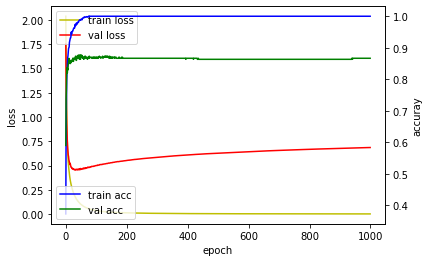

In [14]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 학습과정 살펴보기
* 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정합니다.
* 반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단합니다.

In [15]:
print('## training loss and accuracy ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and accuracy ##
[2.03818267754146, 1.5489052363804408, 1.2097517166818892, 0.9876985013484955, 0.8346464255026409, 0.7306362705571311, 0.649454750759261, 0.5883402628558022, 0.5395576932600566, 0.4953461738569396, 0.46439115958554406, 0.43410255781241824, 0.40803000756672453, 0.3829620763659477, 0.3618579643113273, 0.3419353233916419, 0.32777290216514043, 0.3098486550152302, 0.2936378632272993, 0.28331324697605204, 0.27035166333828653, 0.2602737506585462, 0.24866899640432427, 0.23922041931322643, 0.22897353736417633, 0.22121576903653997, 0.21165531112679414, 0.20607501433363984, 0.19675255875502315, 0.19103170920695578, 0.183606531098485, 0.17729923187622001, 0.1711532304861716, 0.16572551519743034, 0.1603626889841897, 0.1536906375948872, 0.15013648377997535, 0.1455330090863364, 0.14148797432758978, 0.13677361889609269, 0.13147228067474706, 0.12942335358155624, 0.12426540303443159, 0.12145758688982045, 0.1176586862653494, 0.11450629283541015, 0.11078862925725323, 0.108

### 7. 모델 평가하기
* 준비된 시험셋으로 학습한 모델을 평가합니다.
* 케라스에서는 evaluate() 함수를 사용합니다.

In [16]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - ETA: 0s - loss: 0.5390 - accuracy: 0.88 - 0s 45us/sample - loss: 0.5433 - accuracy: 0.8820
## evaluation loss and_metrics ##
[0.5432631515190005, 0.882]


### 8. 모델 사용하기
* 임의의 입력으로 모델의 출력을 얻습니다.
* 케라스에서는 predict() 함수를 사용합니다.

In [17]:
xhat = X_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[2.4687968e-10 6.6460260e-13 8.7105595e-10 2.9268645e-09 6.3525686e-12
  1.4755410e-11 1.8348182e-14 9.9999988e-01 6.5938255e-10 8.0849595e-08]]


### 9. 러닝 모델 가시화 기능 확인

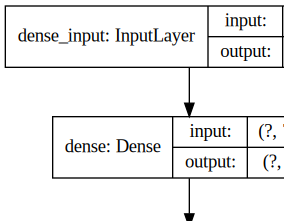

In [18]:
import pydot
import graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 10. 모델 저장과 모델 로딩 

In [19]:
from tensorflow.keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')